# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.dummy import DummyRegressor
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy. interpolate

warnings.filterwarnings('ignore')

In [4]:
try:
    data = pd.read_csv('C:/Users/Пользователь/OneDrive/Документы/Python/gold_recovery_full_new.csv')
    test_data = pd.read_csv('C:/Users/Пользователь/OneDrive/Документы/Python/gold_recovery_test_new.csv')
    train_data = pd.read_csv('C:/Users/Пользователь/OneDrive/Документы/Python/gold_recovery_train_new.csv')
    
except:
    data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')

Сначала посмотрим наобщую информацию и проверим на дубликаты и пропуски.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [45]:
data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [46]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [47]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [48]:
data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [49]:
test_data.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [50]:
train_data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Пропуски есть. Из-за множества столбцов сложно оценить их объем. Лучше их все посчитать.

In [51]:
print('Пропуски в data:', data.isna().sum().sum())
print('Пропуски в test_data:', test_data.isna().sum().sum())
print('Пропуски в train_data:', train_data.isna().sum().sum())

Пропуски в data: 4481
Пропуски в test_data: 90
Пропуски в train_data: 4100


Теперь проверим на дубликаты.

In [52]:
print('Дубликаты в data:', data.duplicated().sum())
print('Дубликаты в test_data:', test_data.duplicated().sum())
print('Дубликаты в train_data:', train_data.duplicated().sum())

Дубликаты в data: 0
Дубликаты в test_data: 0
Дубликаты в train_data: 0


Дубликатов в проекте нет, а вот пропусков довольно много.
Теперь вычислим эффективность обогащения  на обучающей выборке для признака rougher.output.recovery.

In [53]:
formula = ((train_data['rougher.output.concentrate_au']*(train_data['rougher.input.feed_au']-train_data['rougher.output.tail_au'])) / (train_data['rougher.input.feed_au']*(train_data['rougher.output.concentrate_au']-train_data['rougher.output.tail_au'])))*100

Проверим MAE.

In [54]:
mae = mean_absolute_error(train_data['rougher.output.recovery'],formula)
mae

9.73512347450521e-15

Значение ошибки совсем небольшое. Расчеты произведены верно.

Теперь проанализируем признаки, недоступные в тестовой выборке. Для этого применим метод difference.

In [55]:
train_columns = train_data.columns
test_columns = test_data.columns
resalt = train_columns.difference(test_columns)
resalt

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Чтож, перечень столбцов, отсутствующих в тестовом датасете достаточно велик. 
Для начала добавим в тестовую выборку нужные нам столбцы.И удалим ненужные столбцы из обучающей.
Пропуски заполним средним значением по столбцу. 

In [56]:
data_target_test = data[['date','rougher.output.recovery', 'final.output.recovery']]
test_data = test_data.merge(data_target_test, how='left', on='date')

In [57]:
train_data = train_data[test_data.columns]

In [58]:
data = data.fillna(method="bfill")
test_data = test_data.fillna(method="bfill")
train_data = train_data.fillna(method="bfill")

Обнулим индексы.

In [59]:
data.reset_index(drop= True , inplace= True )
test_data.reset_index(drop= True , inplace= True )
train_data.reset_index(drop= True , inplace= True )

И для удобства работы с данными все '.' в названиях столбцов заменим на '_'

In [60]:
data.columns = data.columns.str.replace('.', '_')
test_data.columns = test_data.columns.str.replace('.', '_')
train_data.columns = train_data.columns.str.replace('.', '_')

## Анализ данных

Напишем функцию, которая выводит распределение средних значений концетрации металлов на различных этапах обработки.
Для наглядности в построении графика применим к разным этапам разработки следующие цвета:
- <font color='red'>красный</font> : концентрация до флотрации.
- <font color='cyan'>голубой</font> : концентрация после флотрации.
- <font color='magenta'>фиолетовый</font> : первичная очистка.
- <font color='olivedrab'>оливковый</font> : вторичная очистка.

In [61]:
def concentration_plot(columns, title_name):
    colors = ['red', 'cyan', 'magenta', 'olivedrab']
    plt.figure(figsize=(17,5))
    for i in range(len(columns)):
        sns.distplot(data[columns[i]], hist = False, kde = True, color=colors[i]).set(xlabel='Среднее значение', 
                                                                   ylabel='Плотность частоты', title=title_name);  
    plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0, labels=["концентрация до флотрации","концентрация после флотрации","первичная очистка","вторичная очистка"])

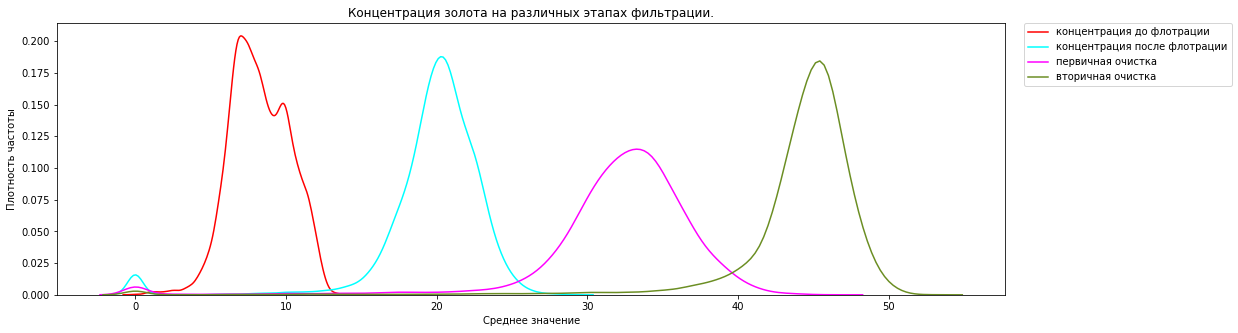

In [62]:
concentration_plot(['rougher_input_feed_au' ,  
                    'rougher_output_concentrate_au',  
                    'primary_cleaner_output_concentrate_au',  
                    'final_output_concentrate_au'], 
                    'Концентрация золота на различных этапах фильтрации.')

Тут все максимально упорядоченно. С каждым новым этапом очистки концентрация золота растет. 

Посмотрим на серебро.

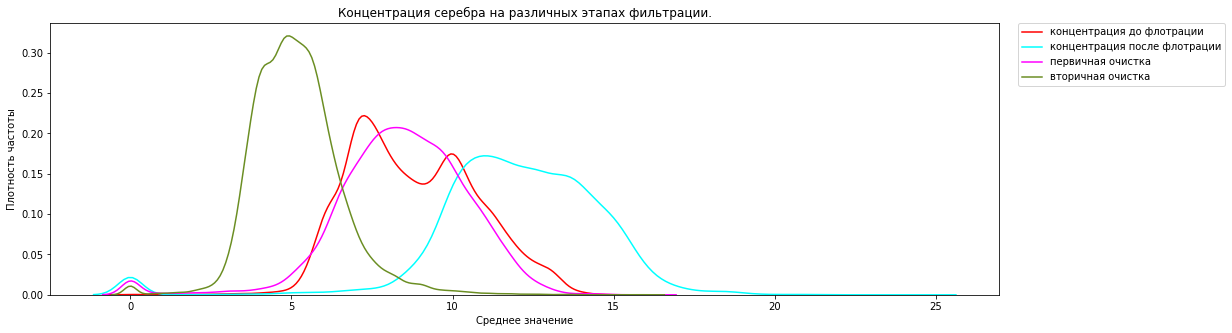

In [63]:
concentration_plot(['rougher_input_feed_ag', 
                    'rougher_output_concentrate_ag', 
                    'primary_cleaner_output_concentrate_ag', 
                    'final_output_concentrate_ag'], 
                    'Концентрация серебра на различных этапах фильтрации.')

С серебром не все так однозначно. Показатели до флотрации и после первичной очистки очень схожи. А вот после вторичной очистки показатели минимальны. Самая большая консентрация серебра наблюдается после флотрации.

Переходим к свинцу.

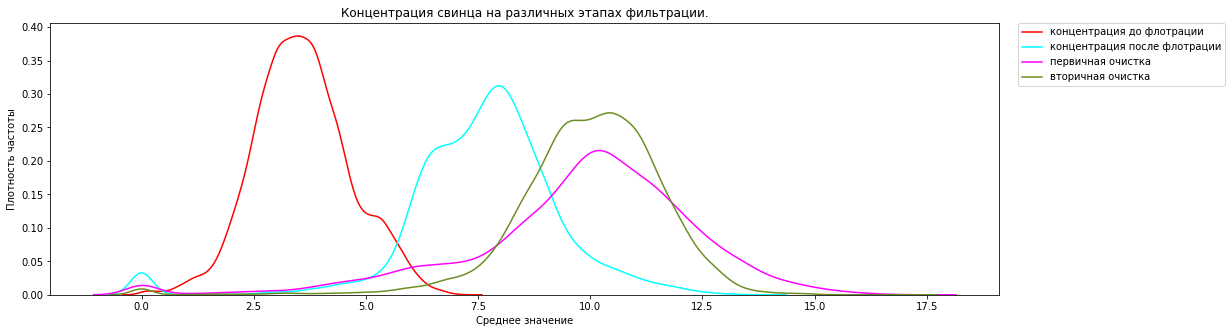

In [64]:
concentration_plot(['rougher_input_feed_pb', 
                    'rougher_output_concentrate_pb', 
                    'primary_cleaner_output_concentrate_pb', 
                    'final_output_concentrate_pb'], 
                    'Концентрация свинца на различных этапах фильтрации.')

Минимальные значения наблюдаются до флотрации. После флотрации показатели заметно вырастают. Первичная очистка дает еще один прирост. А вот вторичная очистка показатели по концентрации практически не меняет, но увеличивается плотность частоты встречаемых значений.

Дальше сравним распределение размеров гранул сырья на обучающей и тестовой выборках.

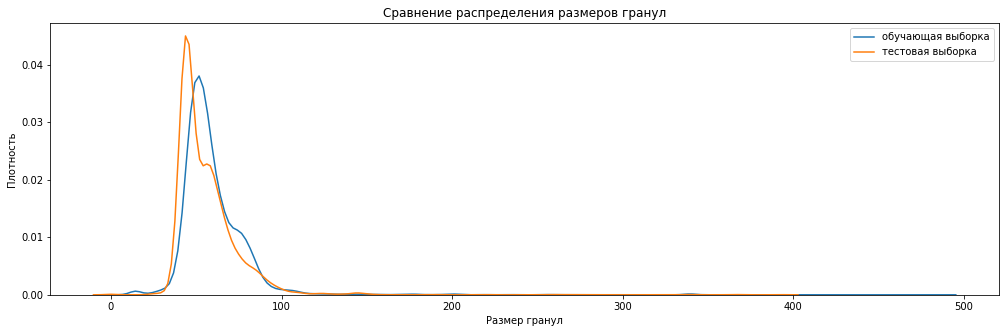

In [65]:
plt.figure(figsize=(17,5))

sns.kdeplot(data=train_data,x = 'rougher_input_feed_size')
sns.kdeplot(data=test_data,x = 'rougher_input_feed_size')

plt.legend(loc='upper right', labels=["обучающая выборка","тестовая выборка"])
plt.title('Сравнение распределения размеров гранул')
plt.xlabel('Размер гранул')
plt.ylabel('Плотность')
plt.show()

Отлично! Размер гранул практически идентичный. Можно продолжать исследование.

Посмотрим на суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

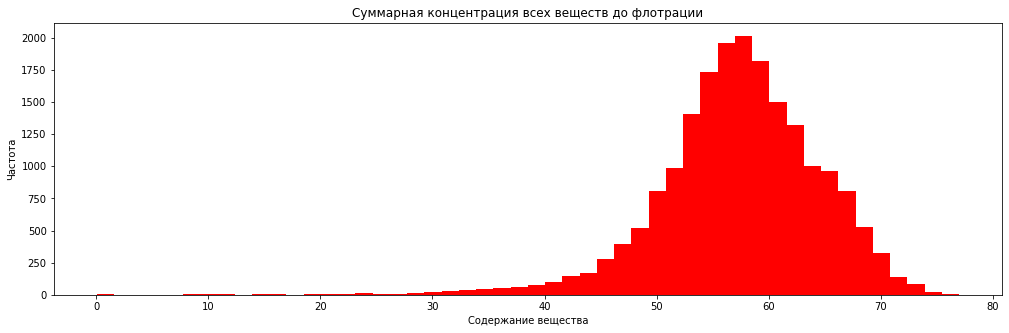

In [66]:
rougher_input = data['rougher_input_feed_ag']+data['rougher_input_feed_au']+data['rougher_input_feed_pb']+data['rougher_input_feed_sol']

rougher_input.plot(y = 'summary_rougher_input_feed_',kind='hist', bins = 50, figsize=(17,5), color='red')

plt.title('Суммарная концентрация всех веществ до флотрации')
plt.xlabel('Содержание вещества')
plt.ylabel('Частота')
plt.show()


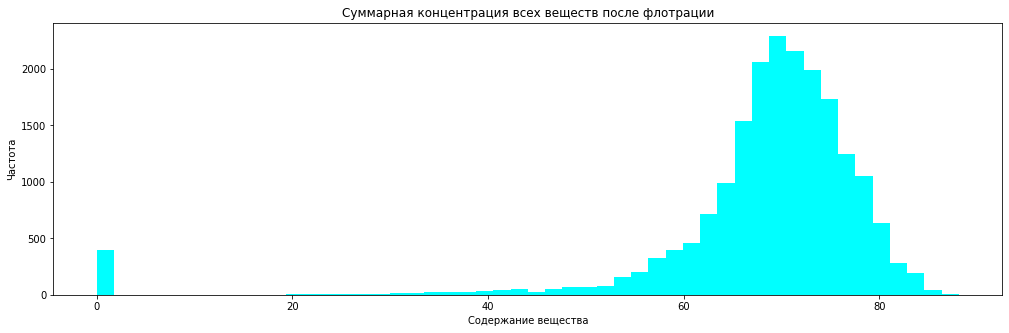

In [67]:
rougher_output = data['rougher_output_concentrate_ag']+data['rougher_output_concentrate_au']+data['rougher_output_concentrate_pb']+data['rougher_output_concentrate_sol']

rougher_output.plot(y = 'summary_rougher_output_concentrate_',kind='hist', bins = 50, figsize=(17,5), color='cyan')

plt.title('Суммарная концентрация всех веществ после флотрации')
plt.xlabel('Содержание вещества')
plt.ylabel('Частота')
plt.show()

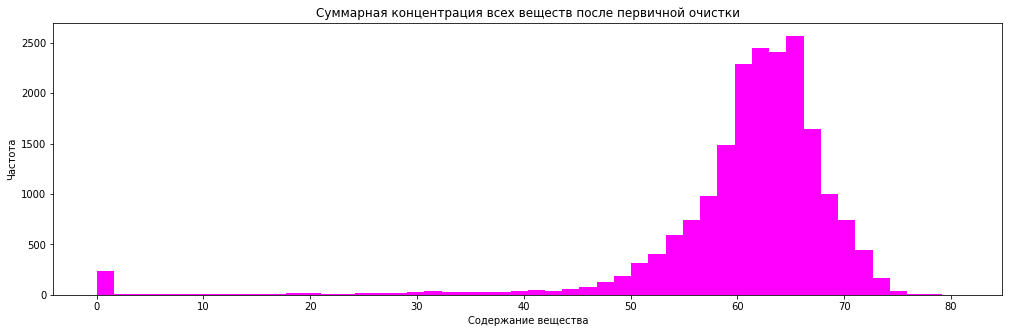

In [68]:
primary_cleaner = data['primary_cleaner_output_concentrate_ag']+data['primary_cleaner_output_concentrate_au']+data['primary_cleaner_output_concentrate_pb']+data['primary_cleaner_output_concentrate_sol']

primary_cleaner.plot(y = 'summary_primary_cleaner_concentrate_',kind='hist', bins = 50, figsize=(17,5), color='magenta')

plt.title('Суммарная концентрация всех веществ после первичной очистки')
plt.xlabel('Содержание вещества')
plt.ylabel('Частота')
plt.show()

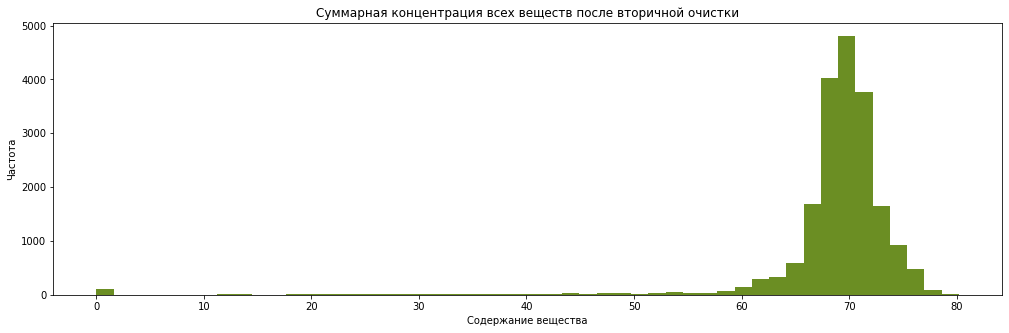

In [69]:
final_output = data['final_output_concentrate_ag']+data['final_output_concentrate_au']+data['final_output_concentrate_pb']+data['final_output_concentrate_sol']

final_output.plot(y = 'summary_final_output_concentrate_',kind='hist', bins = 50, figsize=(17,5), color='olivedrab')

plt.title('Суммарная концентрация всех веществ после вторичной очистки')
plt.xlabel('Содержание вещества')
plt.ylabel('Частота')
plt.show()

Средние показатели концентрации веществ показывают 60-70 единиц. Так же можно заметить большое скопление показателей возле 0. Такого быть не может, эти данные лучше удалить.

In [70]:
data = data.query('rougher_input_feed_ag != 0 and rougher_input_feed_au != 0 and rougher_input_feed_pb != 0 and rougher_input_feed_sol != 0')
data = data.query('rougher_output_concentrate_ag != 0 and rougher_output_concentrate_au != 0 and rougher_output_concentrate_pb != 0 and rougher_output_concentrate_sol != 0')
data = data.query('primary_cleaner_output_concentrate_ag != 0 and primary_cleaner_output_concentrate_au != 0 and primary_cleaner_output_concentrate_pb != 0 and primary_cleaner_output_concentrate_sol != 0')
data = data.query('final_output_concentrate_ag != 0 and final_output_concentrate_au != 0 and final_output_concentrate_pb != 0 and final_output_concentrate_sol != 0')

train_data = train_data.query('rougher_input_feed_ag != 0 and rougher_input_feed_au != 0 and rougher_input_feed_pb != 0 and rougher_input_feed_sol != 0')

## Модель

Напишем функцию для вычисления итоговой sMAPE.

In [71]:
def smape(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

def final_smape(smape_rougher,smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)


Удалим больше не нужный нам столбец с датой.

In [72]:
test_data.drop(['date'],axis = 1 ,inplace=True)
train_data.drop(['date'],axis = 1 ,inplace=True)

Обозначим признаки.

In [73]:
features_train_rougher = train_data.filter(regex='rougher',axis=1).drop(['rougher_output_recovery'], axis=1)
cols = set(train_data.columns) - set(features_train_rougher.columns)
features_train_final = train_data.drop(cols, axis=1)

target_train_rougher = train_data['rougher_output_recovery']
target_train_final = train_data['final_output_recovery']

features_test_rougher = test_data.filter(regex='rougher',axis=1).drop(['rougher_output_recovery'], axis=1)
features_test_final = test_data.drop(cols, axis=1)

target_test_rougher = test_data['rougher_output_recovery']
target_test_final = test_data['final_output_recovery']

Промаштабируем данные.

In [74]:
numeric = features_train_rougher.columns
numeric_2 = features_train_final.columns

scaler = StandardScaler()
scaler_2 = StandardScaler()

scaler.fit(features_train_rougher[numeric])
scaler_2.fit(features_train_final[numeric_2])

features_train_rougher[numeric] = scaler.transform(features_train_rougher[numeric])
features_train_final[numeric] = scaler.transform(features_train_final[numeric])

features_test_rougher[numeric_2] = scaler.transform(features_test_rougher[numeric_2])
features_test_final[numeric_2] = scaler_2.transform(features_test_final[numeric_2])


Посчитаем sMAPE для трех моделей.

In [75]:
model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
rougher_linear = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=scorer, cv=5).mean()
final_linear = cross_val_score(model, features_train_final, target_train_final, scoring=scorer, cv=5).mean()
print('sMape', final_smape(rougher_linear, final_linear))

sMape -10.846586801842962


sMape для модели LinearRegression() равен -10.846586801842962

In [76]:
for depth in range(1, 10):
    for samples_leaf in range(5,20,5):
        model_2 = DecisionTreeRegressor(random_state=12345, max_depth = depth, min_samples_leaf = samples_leaf )
        scorer = make_scorer(smape, greater_is_better=False)
        rougher_tree = cross_val_score(model_2, features_train_rougher, target_train_rougher, scoring=scorer, cv=5).mean()
        final_tree = cross_val_score(model_2, features_train_final, target_train_final, scoring=scorer, cv=5).mean()
        print('depth',depth,'min_samples_leaf',samples_leaf)
        print('Итоговое sMAPE для решающего дерева:',final_smape(rougher_tree, final_tree))
print()

depth 1 min_samples_leaf 5
Итоговое sMAPE для решающего дерева: -11.018732910943609
depth 1 min_samples_leaf 10
Итоговое sMAPE для решающего дерева: -11.018732910943609
depth 1 min_samples_leaf 15
Итоговое sMAPE для решающего дерева: -11.018732910943609
depth 2 min_samples_leaf 5
Итоговое sMAPE для решающего дерева: -11.557774661811749
depth 2 min_samples_leaf 10
Итоговое sMAPE для решающего дерева: -11.557774661811749
depth 2 min_samples_leaf 15
Итоговое sMAPE для решающего дерева: -11.557774661811749
depth 3 min_samples_leaf 5
Итоговое sMAPE для решающего дерева: -11.1683937515899
depth 3 min_samples_leaf 10
Итоговое sMAPE для решающего дерева: -11.1683937515899
depth 3 min_samples_leaf 15
Итоговое sMAPE для решающего дерева: -11.081856414867103
depth 4 min_samples_leaf 5
Итоговое sMAPE для решающего дерева: -12.179743734056817
depth 4 min_samples_leaf 10
Итоговое sMAPE для решающего дерева: -12.207770200303884
depth 4 min_samples_leaf 15
Итоговое sMAPE для решающего дерева: -11.8767

sMape для модели DecisionTreeRegressor() равен 11.018732910943609

In [77]:
for depth in range(1, 10, 1):
    for est in range(5,25,5):
        
        model_3 = RandomForestRegressor(max_depth=depth, n_estimators=est,random_state=1234)
        scorer = make_scorer(smape, greater_is_better=False)
        rougher_tree = cross_val_score(model_3, features_train_rougher, target_train_rougher,scoring=scorer, cv=5).mean()
        final_tree = cross_val_score(model_3, features_train_final, target_train_final,scoring=scorer, cv=5).mean()
        print('depth',depth,'est',est)
        print('Итоговое sMAPE для решающего дерева:',final_smape(rougher_tree, final_tree))
print()

depth 1 est 5
Итоговое sMAPE для решающего дерева: -11.025035807206176
depth 1 est 10
Итоговое sMAPE для решающего дерева: -11.037147138027507
depth 1 est 15
Итоговое sMAPE для решающего дерева: -11.041555271221313
depth 1 est 20
Итоговое sMAPE для решающего дерева: -11.025270077025292
depth 2 est 5
Итоговое sMAPE для решающего дерева: -11.262411954251785
depth 2 est 10
Итоговое sMAPE для решающего дерева: -11.297102047362134
depth 2 est 15
Итоговое sMAPE для решающего дерева: -11.29215536127379
depth 2 est 20
Итоговое sMAPE для решающего дерева: -11.271625150532213
depth 3 est 5
Итоговое sMAPE для решающего дерева: -10.837160588920595
depth 3 est 10
Итоговое sMAPE для решающего дерева: -10.883815244375327
depth 3 est 15
Итоговое sMAPE для решающего дерева: -10.849109469449193
depth 3 est 20
Итоговое sMAPE для решающего дерева: -10.878793535513545
depth 4 est 5
Итоговое sMAPE для решающего дерева: -11.170335394286857
depth 4 est 10
Итоговое sMAPE для решающего дерева: -11.1660446199184

sMape для модели RandomForestRegressor() равен 10.837160588920595.

А значит именно эту модель признаем самой эффективной.

Проверим ее на тестовой выборке.

In [78]:
model_01 = RandomForestRegressor(max_depth=3, n_estimators=5,random_state=1234)
model_02 = RandomForestRegressor(max_depth=3, n_estimators=5,random_state=1234)

model_01.fit(features_train_rougher, target_train_rougher)
model_02.fit(features_train_final, target_train_final)

test_predictions_01 = model_01.predict(features_test_rougher)
test_predictions_02 = model_02.predict(features_test_final)

smape_01 = smape(target_test_rougher, test_predictions_01)
smape_02 = smape(target_test_final, test_predictions_02)

print('sMAPE для rougher:',smape_01)
print('sMAPE для final:',smape_02)
print('sMAPE на тестовой выборке:',final_smape(smape_01,smape_02))

sMAPE для rougher: 9.969394810980663
sMAPE для final: 9.338565383524564
sMAPE на тестовой выборке: 9.496272740388589


sMape для модели RandomForestRegressor() на тестовой выборке равен 9.496272740388589.

Теперь проверим модель на адекватность при помощи DummyRegressor.

In [79]:
model_01 = DummyRegressor(strategy= 'mean')
model_02 = DummyRegressor(strategy= 'mean')

model_01.fit(features_train_rougher, target_train_rougher)
model_02.fit(features_train_final, target_train_final)

test_predictions_01 = model_01.predict(features_test_rougher)
test_predictions_02 = model_02.predict(features_test_final)

smape_01 = smape(target_test_rougher, test_predictions_01)
smape_02 = smape(target_test_final, test_predictions_02)

print('sMAPE для rougher:',smape_01)
print('sMAPE для final:',smape_02)
print('sMAPE на тестовой выборке:',final_smape(smape_01,smape_02))

sMAPE для rougher: 10.379799283438492
sMAPE для final: 10.25957407354855
sMAPE на тестовой выборке: 10.289630376021035


Показатель sMape для DummyRegressor 10.289630376021035. Ошибка больше, чем в нашей модели, а значит признаем ее адекватной)

Мной были подготовлены и проанализированны данные для восстановления золота из руды.

* Проанализированы концентрации металлов (Au, Ag, Pb) на всех стадиях очистки.
* Изучены распределения гранул сырья для обучающей и тестовой выборок.
* Исследованна суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Построенно несколько моделей.

* Рассмотрены модели RandomForest, DecisionTreeи и LinearRegression
* RandomForest показала себя лучше и была принята за основную модель.
* sMape модели RandomForest меньше, чем у константной, модель признаётся адекватной.